In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print('Tensorflow version: ',tf.__version__)
print('tf.keras version: ',keras.__version__)

Tensorflow version:  2.0.0-alpha0
tf.keras version:  2.2.4-tf


### Fashion MNIST using the Sequential API

In [3]:
# Load the data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()
# Set up the train and validation sets and scale the features down to the 0-1 range
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
Y_val, Y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test/255.0

print('X train: {}, Y train: {}'.format(X_train.shape, Y_train.shape))
print('X val: {}, Y val: {}'.format(X_val.shape, Y_val.shape))
print('X test: {}, Y test: {}'.format(X_test.shape, Y_test.shape))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

X train: (55000, 28, 28), Y train: (55000,)
X val: (5000, 28, 28), Y val: (5000,)
X test: (10000, 28, 28), Y test: (10000,)


In [4]:
# Create the model (using the Sequential API)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.05), metrics=["accuracy"])

In [6]:
# Train the model
try:
    model = keras.models.load_model('fashion_mnist_ANN.h5')
except:
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_val,Y_val), callbacks=[early_stopping_cb])
    # Plot the learning curves
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.title('Learning Curves')
    plt.ylabel('epochs')
    plt.show()

In [7]:
# Evaluate the model on the test set to get the general performance
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3269 - accuracy: 0.8846


[0.32685283379554747, 0.8846]

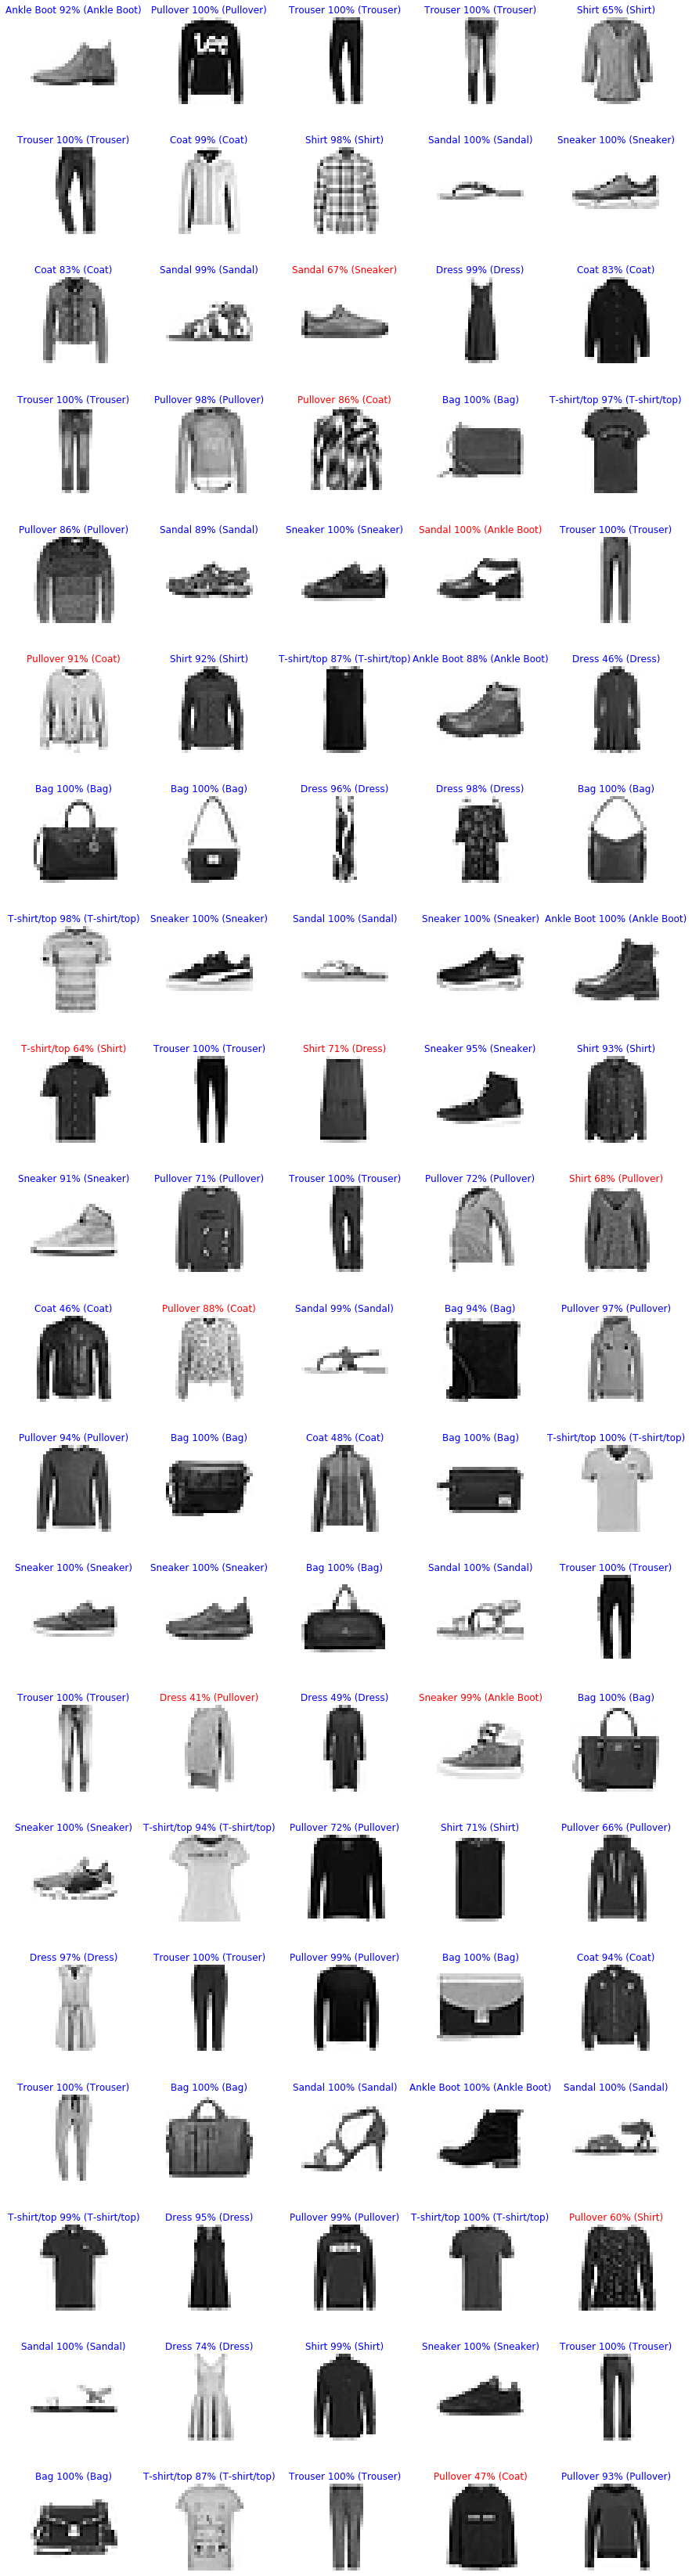

In [11]:
# Make predictions using the model
Y_test_proba = model.predict(X_test).round(2) # use predict() to get the estimated probabilities for each class
Y_test_pred = np.argmax(Y_test_proba, axis=-1) # use predict_classes() to get the class index corresponding to the highest estimated probability

# Plot the images, predicted labels and the target labels
n_rows = 20
n_cols = 5
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        if Y_test[index] == Y_test_pred[index]:
            color = 'blue'
        else:
            color = 'red'
        plt.title("{} {:2.0f}% ({})".format(class_names[Y_test_pred[index]],
                                    100*np.max(Y_test_proba[index]),
                                    class_names[Y_test[index]]),
                                    color=color)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('fashion_mnist_results_plot', tight_layout=False)
plt.show()  